In [1]:
%cd /content/drive/MyDrive/ML/Intent Classification

/content/drive/MyDrive/ML/Intent Classification


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('intent_dataset.csv')
df

,Unnamed: 0,sentence,intents
0,0,what alarms do i have set right now,alarm_query
1,1,checkout today alarm of meeting,alarm_query
2,2,report alarm settings,alarm_query
3,3,see see for me the alarms that you have set to...,alarm_query
4,4,is there an alarm for ten am,alarm_query
...,...,...,...
8649,9955,how hot is it in miami,weather_query
8650,9956,will it snow next week,weather_query
8651,9957,am i gonna need rain boots,weather_query
8652,9958,should i bring warm clothes,weather_query


In [4]:
df = df.drop('Unnamed: 0', 1)

In [5]:
df

,sentence,intents
0,what alarms do i have set right now,alarm_query
1,checkout today alarm of meeting,alarm_query
2,report alarm settings,alarm_query
3,see see for me the alarms that you have set to...,alarm_query
4,is there an alarm for ten am,alarm_query
...,...,...
8649,how hot is it in miami,weather_query
8650,will it snow next week,weather_query
8651,am i gonna need rain boots,weather_query
8652,should i bring warm clothes,weather_query


In [6]:
df['intents'].value_counts()

play_game                   175
qa_currency                 175
alarm_query                 175
general_quirky              175
iot_hue_lightchange         175
general_repeat              175
music_query                 175
email_querycontact          175
general_negate              175
email_sendemail             175
transport_ticket            175
weather_query               175
social_post                 175
takeaway_query              175
calendar_query              175
lists_createoradd           175
qa_definition               175
calendar_remove             175
iot_coffee                  175
play_audiobook              175
general_dontcare            175
calendar_set                175
transport_query             175
lists_remove                175
iot_hue_lightoff            175
cooking_recipe              175
play_podcasts               175
general_confirm             175
news_query                  175
qa_stock                    175
play_radio                  175
general_

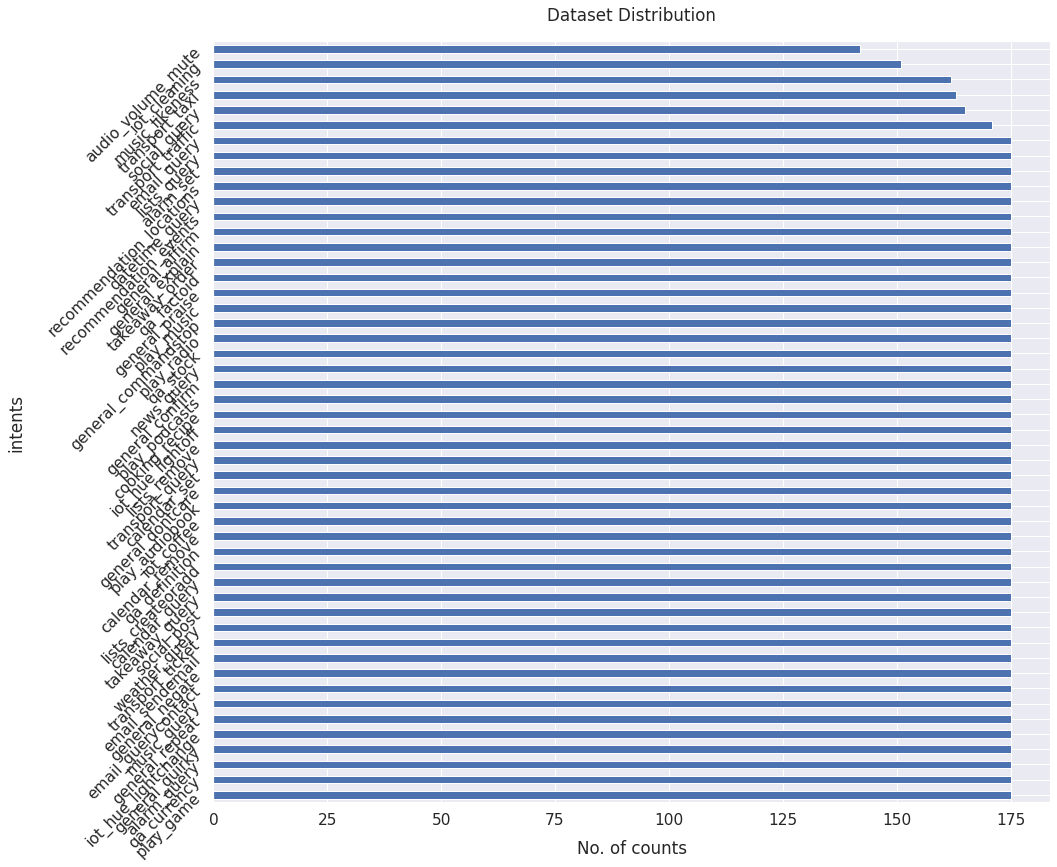

In [7]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set(font_scale=1.4)
df['intents'].value_counts().plot(kind='barh', figsize=(15, 14))
plt.xlabel("No. of counts", labelpad=12)
plt.ylabel("intents", labelpad=20)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Remove Stopwords

In [8]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
df['clean_sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df.head(5)

,sentence,intents,clean_sentence
0,what alarms do i have set right now,alarm_query,alarms set right
1,checkout today alarm of meeting,alarm_query,checkout today alarm meeting
2,report alarm settings,alarm_query,report alarm settings
3,see see for me the alarms that you have set to...,alarm_query,see see alarms set tomorrow morning
4,is there an alarm for ten am,alarm_query,alarm ten


In [10]:
df.to_csv('remove_stp.csv')

Remove punctuation

In [11]:
df['clean_sentence'] = df['clean_sentence'].str.replace('[^\w\s]','"')

In [12]:
df.head(5)

,sentence,intents,clean_sentence
0,what alarms do i have set right now,alarm_query,alarms set right
1,checkout today alarm of meeting,alarm_query,checkout today alarm meeting
2,report alarm settings,alarm_query,report alarm settings
3,see see for me the alarms that you have set to...,alarm_query,see see alarms set tomorrow morning
4,is there an alarm for ten am,alarm_query,alarm ten


Remove Numeric Value

In [13]:
import re
for i in range(len(df['clean_sentence'] )):
  df['clean_sentence'][i] = re.sub(r'[0-9]+', '',str(df['clean_sentence'][i]))

Correct Spelling

In [14]:
from textblob import TextBlob
df['clean_sentence'] = df['clean_sentence'].apply(lambda x: str(TextBlob(x).correct()))

Tokenization

In [16]:
import nltk
nltk.download('punkt')
df['clean_sentence'] = df['clean_sentence'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
df.head(5)

,sentence,intents,clean_sentence
0,what alarms do i have set right now,alarm_query,"[alarms, set, right]"
1,checkout today alarm of meeting,alarm_query,"[checkout, today, alarm, meeting]"
2,report alarm settings,alarm_query,"[report, alarm, settings]"
3,see see for me the alarms that you have set to...,alarm_query,"[see, see, alarms, set, tomorrow, morning]"
4,is there an alarm for ten am,alarm_query,"[alarm, ten]"


Stemming

In [18]:
df['clean_sentence'] = df['clean_sentence'].apply(lambda x: ' '.join(map(str, x)))

In [19]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['clean_sentence'] = df['clean_sentence'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [20]:
df.head(5)

,sentence,intents,clean_sentence
0,what alarms do i have set right now,alarm_query,alarm set right
1,checkout today alarm of meeting,alarm_query,checkout today alarm meet
2,report alarm settings,alarm_query,report alarm set
3,see see for me the alarms that you have set to...,alarm_query,see see alarm set tomorrow morn
4,is there an alarm for ten am,alarm_query,alarm ten


Lemmatizing

In [21]:
import nltk
nltk.download('wordnet')
from textblob import Word
df['clean_sentence'] = df['clean_sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [22]:
df.head(5)

,sentence,intents,clean_sentence
0,what alarms do i have set right now,alarm_query,alarm set right
1,checkout today alarm of meeting,alarm_query,checkout today alarm meet
2,report alarm settings,alarm_query,report alarm set
3,see see for me the alarms that you have set to...,alarm_query,see see alarm set tomorrow morn
4,is there an alarm for ten am,alarm_query,alarm ten


In [23]:
df.to_csv('after_all_preprocess.csv')